# BREVE ESTUDO DE MORTALIDADE NO BRASIL

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf # auto correlation function
from statsmodels.graphics.tsaplots import plot_acf 

import seaborn as sns

import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


A seguir, importação de dados obtidos em dados.gov.br

Legenda:

H60 - Homens acima de 60 anos
H2059 - Homens de 20 a 59 anos
H1019 - Homens de 10 a 19 anos

M60 - Mulheres acima de 60 anos
M2059 - Mulheres de 20 a 59 anos
M1019 - Mulheres de 10 a 19 anos


In [3]:
mortalidadeH60 = pd.read_csv("mortalidadeH60.csv")
mortalidadeH2059 = pd.read_csv("mortalidadeH2059.csv")
mortalidadeH1019 = pd.read_csv("mortalidadeH1019.csv")
mortalidadeM60 = pd.read_csv("mortalidadeM60.csv")
mortalidadeM2059 = pd.read_csv("mortalidadeM2059.csv")
mortalidadeM1019 = pd.read_csv("mortalidadeM1019.csv")
mortalidadeinfantil = pd.read_csv("mortalidadeinfantil.csv")

mortalidadeH60.name = 'mortalidadeH60'
mortalidadeH2059.name = 'mortalidadeH2059'
mortalidadeH1019.name = 'mortalidadeH1019'

mortalidadeM60.name = 'mortalidadeM60'
mortalidadeM2059.name = 'mortalidadeM2059'
mortalidadeM1019.name = 'mortalidadeM1019'
mortalidadeinfantil.name = 'mortalidadeinfantil'


### Listando as 5 colunas em cada um dos dataframes, que contém as maiores causas de mortalidade em cada um dos grupos identifica e o ano correspondente 

In [6]:
print('HOMENS 60+    \n\n ',mortalidadeH60.columns.tolist(),'\n ')
print('MULHERES 60+   \n \n ',mortalidadeM60.columns.tolist(),'\n ')

print('HOMENS 20-59    \n \n',mortalidadeH2059.columns.tolist(),'\n ')
print('MULHERES 20-59  \n  \n ',mortalidadeM2059.columns.tolist(),'\n ')

print('HOMENS 10-19    \n \n',mortalidadeH1019.columns.tolist(),'\n ')
print('MULHERES 10-19   \n  \n',mortalidadeH1019.columns.tolist(),'\n ')



HOMENS 60+    

  ['Ano', 'Aparelho Circulatório', 'Neoplasias', 'Aparelho Respiratório', 'Sintomas e Sinais', 'Endocrinas'] 
 
MULHERES 60+   
 
  ['Ano', 'Aparelho Circulatório', 'Neoplasias', 'Aparelho Respiratório', 'Sintomas e Sinais', 'Endocrinas'] 
 
HOMENS 20-59    
 
 ['Ano', 'Causas Externas', 'Aparelho Circulatorio', 'Neoplasias', 'Aparelho Digestivo', 'Sintomas e Sinais'] 
 
MULHERES 20-59  
  
  ['Ano', 'Causas Externas', 'Aparelho Circulatorio', 'Neoplasias', 'Infecciosas Parasitárias', 'Aparelho Respiratório'] 
 
HOMENS 10-19    
 
 ['Ano', 'Causas Externas', 'Aparelho Circulatorio', 'Neoplasias', 'Sistema Nervoso', 'Sintomas e sinais'] 
 
MULHERES 10-19   
  
 ['Ano', 'Causas Externas', 'Aparelho Circulatorio', 'Neoplasias', 'Sistema Nervoso', 'Sintomas e sinais'] 
 


In [21]:
#print(mortalidadeH60.columns)
#print(mortalidadeM60.columns)

#print(mortalidadeH2059.columns)
#print(mortalidadeM2059.columns)

#print(mortalidadeH1019.columns)
#print(mortalidadeH1019.columns)

ch60=mortalidadeH60.columns.tolist()#.remove('Ano')
cm60=mortalidadeM60.columns.tolist()#.remove('Ano')

ch20=mortalidadeH2059.columns.tolist()#.remove('Ano')
cm20=mortalidadeM2059.columns.tolist()#.remove('Ano')

ch10=mortalidadeH1019.columns.tolist()#.remove('Ano')
cm10=mortalidadeH1019.columns.tolist()#.remove('Ano')


listacolunas=[ch60,ch20,ch10,cm60,cm20,cm10]
listacolunassem=[]
for a in listacolunas:
    a=[x for x in a if x != 'Ano']
    listacolunassem.append(a)
#print(listacolunas)

TodasCausas = set().union(*listacolunassem)
TodasCausas= list(TodasCausas)
print("Lista de Todas as maiores causas identificadas no período: \n\n", TodasCausas, "\n")
print("Número Total de categorias identificadas: \n\n",len(TodasCausas), "\n")

#CausasemComum = set().intersection(*listacolunassem)
#CausasemComum = list(CausasemComum)
#print("Lista de causas identificadas em comum em todos anos",CausasemComum)
#print(len(CausasemComum))



listacolunasH=[ch60,ch20,ch10]
listacolunasM=[cm60,cm20,cm10]


listacolunassemH=[]
for a in listacolunasH:
    a=[x for x in a if x != 'Ano']
    listacolunassemH.append(a)


TodasCausasH = set().union(*listacolunassemH)
TodasCausasH= list(TodasCausasH)
print('\n Todos grupos de causas dos homens \n\n ',TodasCausasH, "\n")
print(len(TodasCausas))

#CausasEmComumH = set().intersection(*listacolunassemH)
#CausasEmComumH= list(CausasEmComumH)
#print('\n causas em comum aos homens \n\n ',CausasEmComumH, "\n")
#print(len(CausasEmComumH))



listacolunassemM=[]
for a in listacolunasM:
    a=[x for x in a if x != 'Ano']
    listacolunassemM.append(a)
    
TodasCausasM = set().union(*listacolunassemM)
TodasCausasM = list(TodasCausasM)
print('\n Todos grupos de causas das mulheres \n\n ',TodasCausasM)
print(len(TodasCausasM))

#CausasemComumM = set().intersection(*listacolunassemM)
#CausasemComumM = list(CausasemComumM)
#print('\n grupos de causas em comum a mulheres sao  \n\n',CausasemComumM)
#print(len(CausasemComumM))

Lista de Todas as maiores causas identificadas no período: 

 ['Infecciosas Parasitárias', 'Neoplasias', 'Aparelho Respiratório', 'Sistema Nervoso', 'Aparelho Digestivo', 'Causas Externas', 'Sintomas e sinais', 'Aparelho Circulatorio', 'Endocrinas', 'Aparelho Circulatório', 'Sintomas e Sinais'] 

Número Total de categorias identificadas: 

 11 


 Todos grupos de causas dos homens 

  ['Neoplasias', 'Aparelho Respiratório', 'Sistema Nervoso', 'Aparelho Digestivo', 'Causas Externas', 'Sintomas e sinais', 'Aparelho Circulatorio', 'Endocrinas', 'Aparelho Circulatório', 'Sintomas e Sinais'] 

11

 Todos grupos de causas das mulheres 

  ['Infecciosas Parasitárias', 'Neoplasias', 'Aparelho Respiratório', 'Sistema Nervoso', 'Causas Externas', 'Sintomas e sinais', 'Aparelho Circulatorio', 'Endocrinas', 'Aparelho Circulatório', 'Sintomas e Sinais']
10


## Gráfico de todos os grupos de causas e Ano emparelhados para Homens

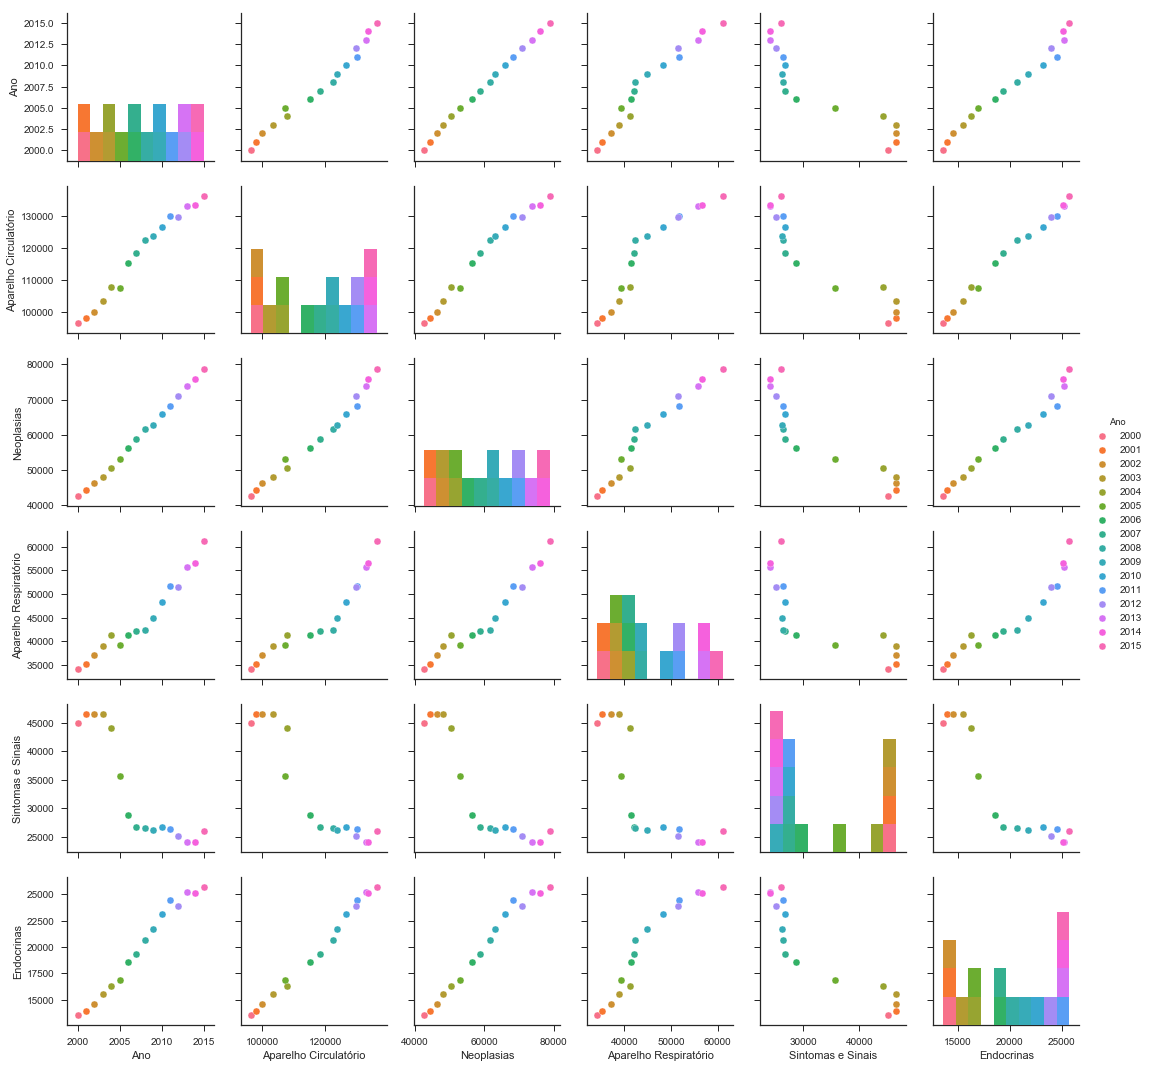

In [6]:
sns.set(style="ticks")
df = mortalidadeH60
sns.pairplot(df, hue='Ano')

## Gráfico de todos os grupos de causas e Ano emparelhados para Mulheres

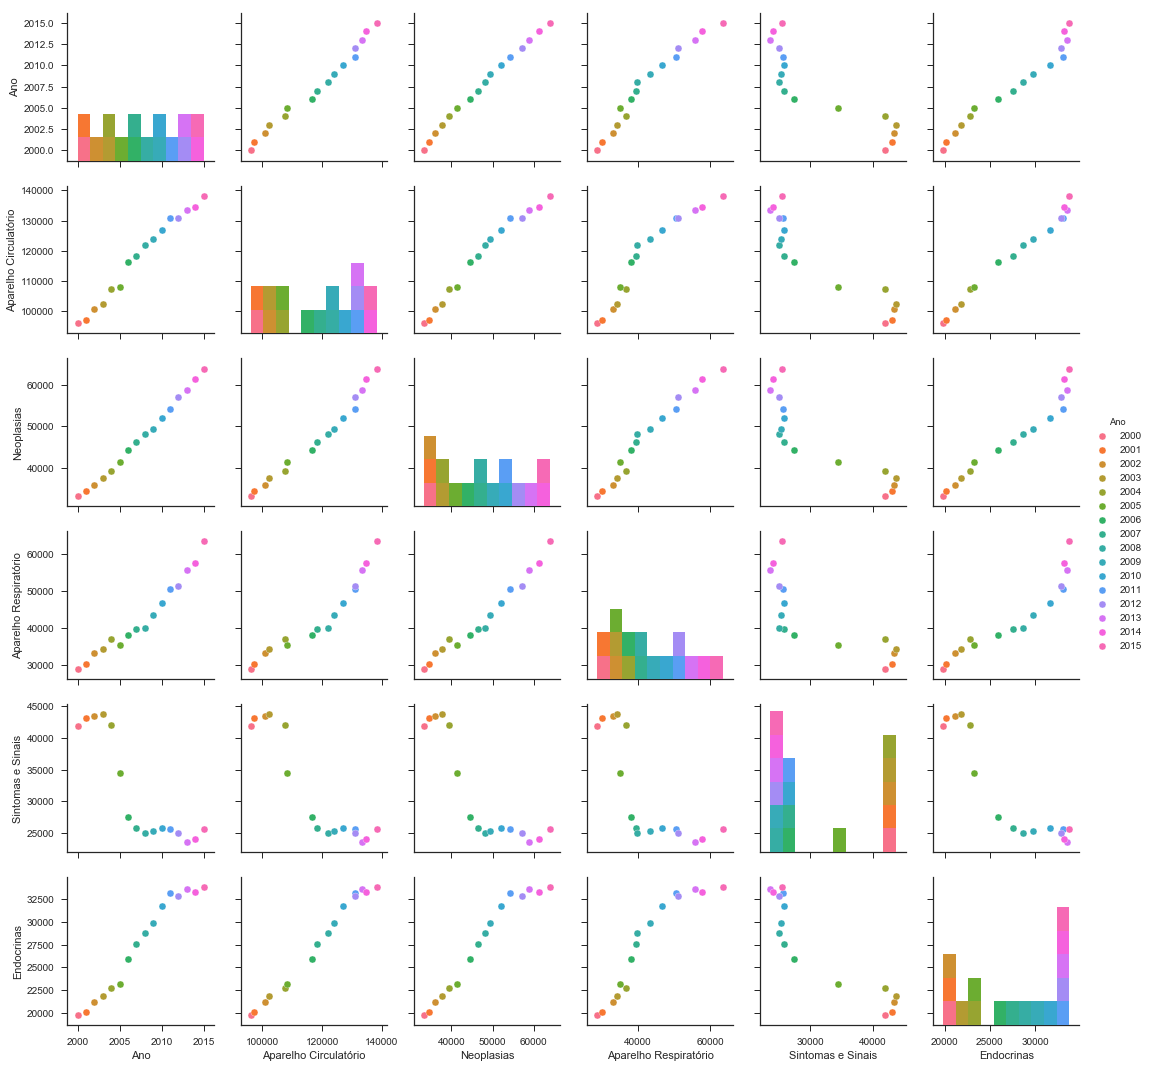

In [7]:
sns.set(style="ticks")
df = mortalidadeM60
sns.pairplot(df, hue='Ano')

In [25]:
from scipy.stats import pearsonr

## Cálculo de correlações entre os grupos de causas para H60+

In [26]:
ch60=mortalidadeH60.columns.drop('Ano')
for p in ch60:
    colunai=ch60.drop(p)
    for q in colunai:
        corrpearson=pearsonr(mortalidadeH60[p], mortalidadeH60[q])

        #if abs(corrpearson[0])>0.5:
        print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)

Aparelho Circulatório tem correlacao 0.9881569520837594 com Neoplasias
Aparelho Circulatório tem correlacao 0.9398938651463203 com Aparelho Respiratório
Aparelho Circulatório tem correlacao -0.9276796066779693 com Sintomas e Sinais
Aparelho Circulatório tem correlacao 0.9946805041473396 com Endocrinas
Neoplasias tem correlacao 0.9881569520837594 com Aparelho Circulatório
Neoplasias tem correlacao 0.9714752375669897 com Aparelho Respiratório
Neoplasias tem correlacao -0.8920401323080602 com Sintomas e Sinais
Neoplasias tem correlacao 0.9888733825957174 com Endocrinas
Aparelho Respiratório tem correlacao 0.9398938651463203 com Aparelho Circulatório
Aparelho Respiratório tem correlacao 0.9714752375669897 com Neoplasias
Aparelho Respiratório tem correlacao -0.7706241645631758 com Sintomas e Sinais
Aparelho Respiratório tem correlacao 0.9501316349127631 com Endocrinas
Sintomas e Sinais tem correlacao -0.9276796066779693 com Aparelho Circulatório
Sintomas e Sinais tem correlacao -0.892040132

## Cálculo de correlações entre os grupos de causas para H20-59

In [23]:
ch20=mortalidadeH2059.columns.drop('Ano')
for p in ch20:
    colunai=ch20.drop(p)
    for q in colunai:
        corrpearson=pearsonr(mortalidadeH2059[p], mortalidadeH2059[q])

        #if abs(corrpearson[0])>0.5:
        print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)

Causas Externas tem correlacao 0.8802972724187147 com Aparelho Circulatorio
Causas Externas tem correlacao 0.9482423291937144 com Neoplasias
Causas Externas tem correlacao 0.8950617227042098 com Aparelho Digestivo
Causas Externas tem correlacao -0.861907225440727 com Sintomas e Sinais
Aparelho Circulatorio tem correlacao 0.8802972724187147 com Causas Externas
Aparelho Circulatorio tem correlacao 0.9518980904508001 com Neoplasias
Aparelho Circulatorio tem correlacao 0.9560876580799336 com Aparelho Digestivo
Aparelho Circulatorio tem correlacao -0.9345505279028077 com Sintomas e Sinais
Neoplasias tem correlacao 0.9482423291937144 com Causas Externas
Neoplasias tem correlacao 0.9518980904508001 com Aparelho Circulatorio
Neoplasias tem correlacao 0.9538386678469526 com Aparelho Digestivo
Neoplasias tem correlacao -0.9560593375201671 com Sintomas e Sinais
Aparelho Digestivo tem correlacao 0.8950617227042098 com Causas Externas
Aparelho Digestivo tem correlacao 0.9560876580799336 com Aparelh

## Cálculo de correlações entre os grupos de causas para H10-19

In [24]:
ch10=mortalidadeH1019.columns.drop('Ano')
for p in ch10:
    colunai=ch10.drop(p)
    for q in colunai:
        corrpearson=pearsonr(mortalidadeH1019[p], mortalidadeH1019[q])

        #if abs(corrpearson[0])>0.5:
        print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)

Causas Externas tem correlacao 0.40171791454201655 com Aparelho Circulatorio
Causas Externas tem correlacao 0.2062872797864658 com Neoplasias
Causas Externas tem correlacao 0.5305802083152921 com Sistema Nervoso
Causas Externas tem correlacao -0.1854692103566678 com Sintomas e sinais
Aparelho Circulatorio tem correlacao 0.40171791454201655 com Causas Externas
Aparelho Circulatorio tem correlacao -0.0458155514416973 com Neoplasias
Aparelho Circulatorio tem correlacao 0.27838981336532087 com Sistema Nervoso
Aparelho Circulatorio tem correlacao -0.24600488793081168 com Sintomas e sinais
Neoplasias tem correlacao 0.2062872797864658 com Causas Externas
Neoplasias tem correlacao -0.0458155514416973 com Aparelho Circulatorio
Neoplasias tem correlacao 0.5450626939716001 com Sistema Nervoso
Neoplasias tem correlacao -0.4247508518042138 com Sintomas e sinais
Sistema Nervoso tem correlacao 0.5305802083152921 com Causas Externas
Sistema Nervoso tem correlacao 0.27838981336532087 com Aparelho Circu

## Cálculo de correlações entre os grupos de causas para M60+

In [25]:
cm60=mortalidadeM60.columns.drop('Ano')
for p in cm60:
    colunai=cm60.drop(p)
    for q in colunai:
        corrpearson=pearsonr(mortalidadeM60[p], mortalidadeM60[q])

        #if abs(corrpearson[0])>0.5:
        print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)

Aparelho Circulatório tem correlacao 0.9861733715111256 com Neoplasias
Aparelho Circulatório tem correlacao 0.9508754078272869 com Aparelho Respiratório
Aparelho Circulatório tem correlacao -0.9190007995152548 com Sintomas e Sinais
Aparelho Circulatório tem correlacao 0.9925726308133735 com Endocrinas
Neoplasias tem correlacao 0.9861733715111256 com Aparelho Circulatório
Neoplasias tem correlacao 0.9820602759043419 com Aparelho Respiratório
Neoplasias tem correlacao -0.8694843662750077 com Sintomas e Sinais
Neoplasias tem correlacao 0.9750891028321456 com Endocrinas
Aparelho Respiratório tem correlacao 0.9508754078272869 com Aparelho Circulatório
Aparelho Respiratório tem correlacao 0.9820602759043419 com Neoplasias
Aparelho Respiratório tem correlacao -0.771256193925427 com Sintomas e Sinais
Aparelho Respiratório tem correlacao 0.9370169401025501 com Endocrinas
Sintomas e Sinais tem correlacao -0.9190007995152548 com Aparelho Circulatório
Sintomas e Sinais tem correlacao -0.8694843662

In [26]:
cm60=mortalidadeM60.columns.drop('Ano')
for p in cm60:
    colunai=cm60.drop(p)
    for q in colunai:
        corrpearson=pearsonr(mortalidadeM60[p], mortalidadeM60[q])

        #if abs(corrpearson[0])>0.5:
        print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)

Aparelho Circulatório tem correlacao 0.9861733715111256 com Neoplasias
Aparelho Circulatório tem correlacao 0.9508754078272869 com Aparelho Respiratório
Aparelho Circulatório tem correlacao -0.9190007995152548 com Sintomas e Sinais
Aparelho Circulatório tem correlacao 0.9925726308133735 com Endocrinas
Neoplasias tem correlacao 0.9861733715111256 com Aparelho Circulatório
Neoplasias tem correlacao 0.9820602759043419 com Aparelho Respiratório
Neoplasias tem correlacao -0.8694843662750077 com Sintomas e Sinais
Neoplasias tem correlacao 0.9750891028321456 com Endocrinas
Aparelho Respiratório tem correlacao 0.9508754078272869 com Aparelho Circulatório
Aparelho Respiratório tem correlacao 0.9820602759043419 com Neoplasias
Aparelho Respiratório tem correlacao -0.771256193925427 com Sintomas e Sinais
Aparelho Respiratório tem correlacao 0.9370169401025501 com Endocrinas
Sintomas e Sinais tem correlacao -0.9190007995152548 com Aparelho Circulatório
Sintomas e Sinais tem correlacao -0.8694843662

## Visualização da evolução temporal dos grupos de causas da mortalidade para H60+

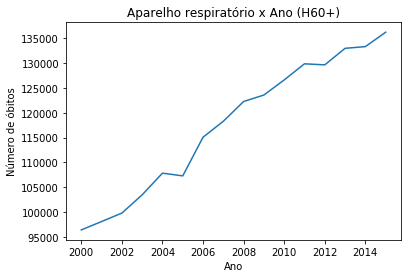

In [38]:
plt.plot(mortalidadeH60['Ano'],mortalidadeH60[ch60.tolist()[0]])
plt.title('Aparelho respiratório x Ano (H60+)')
plt.xlabel('Ano')
plt.ylabel('Número de óbitos')

plt.show()

In [44]:
taxamortH60.head()

""


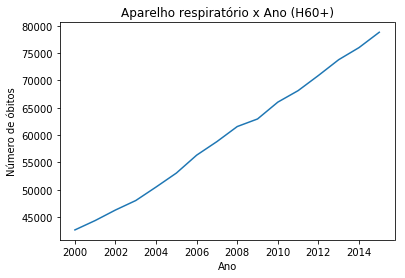

In [65]:
plt.plot(mortalidadeH60['Ano'],mortalidadeH60['Neoplasias'])
plt.title('Aparelho respiratório x Ano (H60+)')
plt.xlabel('Ano')
plt.ylabel('Número de óbitos')
plt.show()

In [ ]:
mortalidadeinfantil

## Inserindo dados de população para obter as taxas relativas de mortalidade 

In [51]:
Pop = pd.read_csv("PopulacaoBrasil.csv")


In [52]:
Pop=Pop[Pop['Ano']>1999]
Pop=Pop[Pop['Ano']<2016]

In [53]:
anos=[2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
populacao=Pop['População']

In [59]:
#print(len(anos))
population=populacao.tolist()
#for i in range(0,len(anos)):
#    anos[i]=int64(ano
pop=[]
for i in population:
    a=i.replace(" ", "")
    #print(a)
    a=int(a)
    pop.append(a)

PoP=pd.Series(pop)

POPULACAO=np.array(PoP)
POPULACAO=POPULACAO.astype(float)

In [60]:
mortalidadeH60
ch60=mortalidadeH60.columns

In [57]:
ch60=mortalidadeH60.columns
ch60=ch60.drop('Ano')
ch2059=mortalidadeH2059.columns
ch2059=ch2059.drop('Ano')
ch1019=mortalidadeH1019.columns
ch1019=ch1019.drop('Ano')

cm60=mortalidadeM60.columns
cm60=cm60.drop('Ano')
cm2059=mortalidadeM2059.columns
cm2059=cm2059.drop('Ano')
cm1019=mortalidadeM1019.columns
cm1019=cm1019.drop('Ano')



listadfs=[mortalidadeH60,mortalidadeH2059,mortalidadeH1019,mortalidadeM60,mortalidadeM2059,mortalidadeM1019]
dictcolunas={'mortalidadeH60':ch60,'mortalidadeH2059':ch2059,'mortalidadeH1019':ch1019,'mortalidadeM60':cm60,'mortalidadeM2059':cm2059,'mortalidadeM1019':cm1019}

In [45]:
taxamortH60 = pd.DataFrame() #"mortalidadeH60.csv")

taxamortH2059 = pd.DataFrame() #"mortalidadeH2059.csv")
taxamortH1019 = pd.DataFrame() #"mortalidadeH1019.csv")
taxamortM60  = pd.DataFrame() #"mortalidadeM60.csv")
taxamortM2059 = pd.DataFrame() #"mortalidadeM2059.csv")
taxamortM1019 = pd.DataFrame() #"mortalidadeM1019.csv")

taxamortH60.name = 'mortalidadeH60'
taxamortH2059.name = 'mortalidadeH2059'
taxamortH1019.name = 'mortalidadeH1019'
taxamortM60.name  = 'mortalidadeM60'
taxamortM2059.name = 'mortalidadeM2059'
taxamortM1019.name = 'mortalidadeM1019'

#taxamortH60.name = 'taxamortH60'
##taxamortH2059.name = 'taxamortH2059'
#taxamortH1019.name = 'taxamortH1019'
#taxamortM60.name  = 'taxamortM60'
#taxamortM2059.name = 'taxamortM2059'
#taxamortM1019.name = 'taxamortM1019'

taxas=[taxamortH60,taxamortH2059,taxamortH1019,taxamortM60  ,taxamortM2059 ,taxamortM1019]

#mortalidadeinfantil = pd.read_csv("mortalidadeinfantil.csv")
dictdata ={'mortalidadeH60':taxamortH60,'mortalidadeH2059':taxamortH2059,'mortalidadeH1019': taxamortH1019,'mortalidadeM60': taxamortM60 ,'mortalidadeM2059': taxamortM2059 ,'mortalidadeM1019': taxamortM1019}

In [62]:
#for a in listadfs:
#    for i in dictcolunas[a.name]:
#        dictdata[a.name][i]=a[i]/PoP
        
for a in listadfs:
    for i in dictcolunas[a.name]:
        #print(dictdata[a.name][i])
        
        #fator 1000000 aqui é só pra salvar os dígitos 
        dictdata[a.name][str(i)]=a[str(i)]*1000000/POPULACAO

        #print(a.name)

    



In [ ]:
#mortalidadeH60['Neoplasias']/pop


print(len(pop))
print(len(mortalidadeH60['Neoplasias']))

print((pop))
print((mortalidadeH60['Neoplasias']))
population

In [50]:
for a in taxas:
    a['Ano']=anos

In [46]:
taxamortH60

""


In [ ]:
>> g = (sns.jointplot("sepal_length", "sepal_width",
...                    data=iris, color="k")
...         .plot_joint(sns.kdeplot, zorder=0, n_levels=6))

In [94]:
anos

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

## Gráficos dois a dois de grupos de causas para taxa de mortalidade e ano

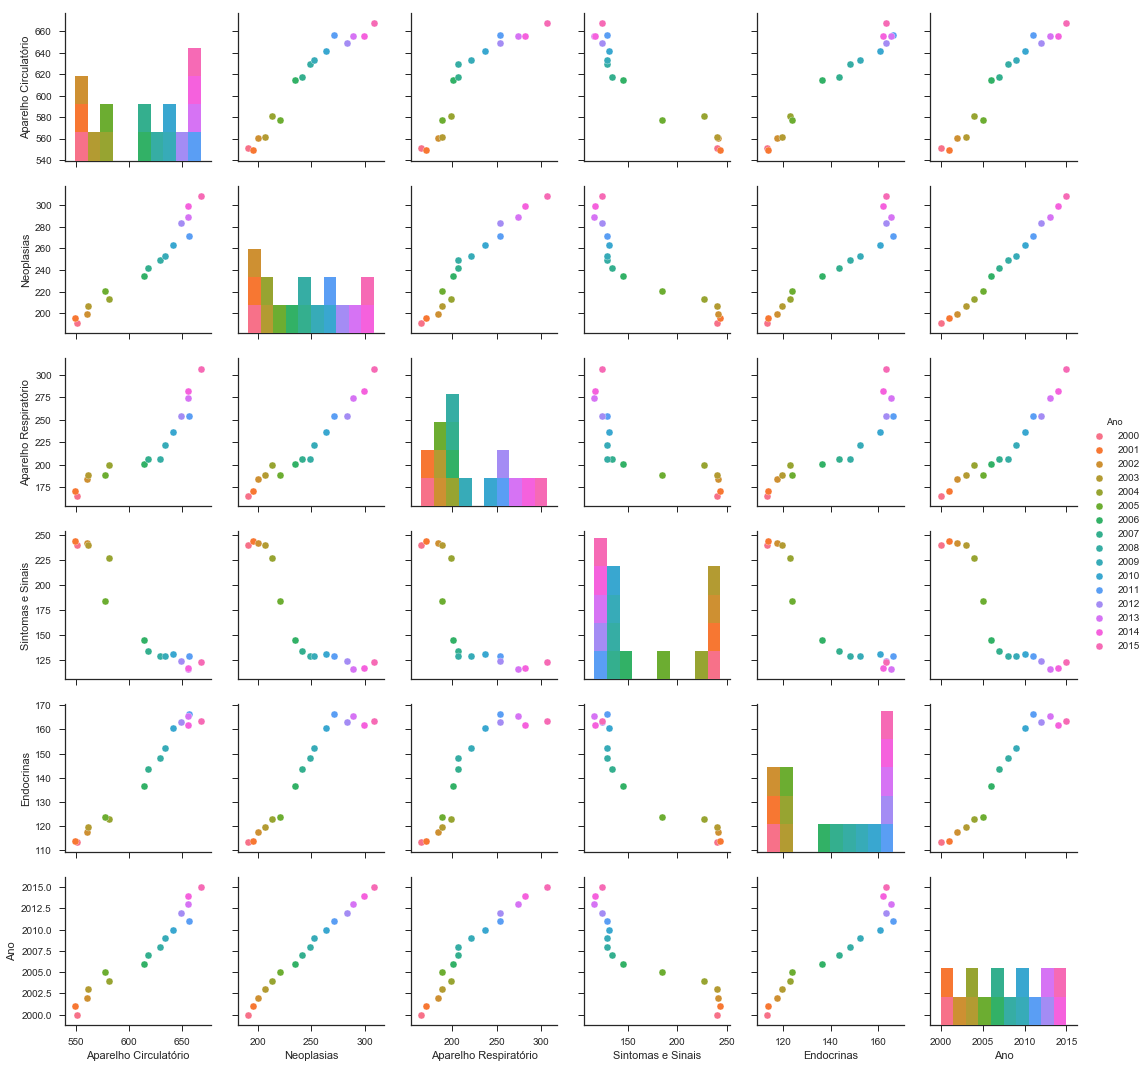

In [79]:
sns.set(style="ticks")
df = taxamortM60
sns.pairplot(df, hue='Ano')

## Aplicação de regressões lineares sobre as taxas de mortalidade e os anos dois a dois

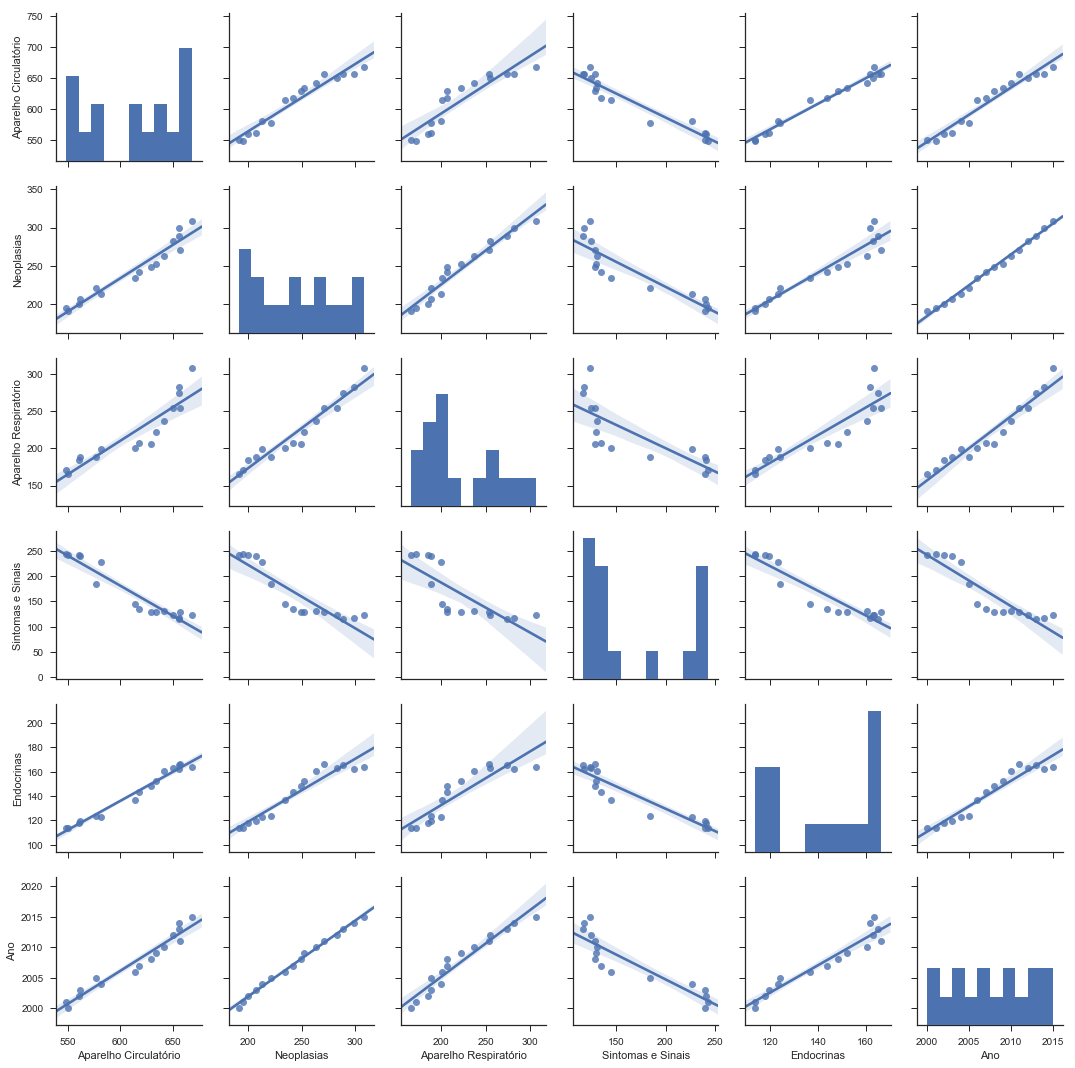

In [80]:
sns.set(style="ticks")
df = taxamortM60
sns.pairplot(df, kind='reg')

In [ ]:
for p in ch60:
    colunai=ch60.drop(p)
    for q in colunai:
        corrpearson=pearsonr(taxamortH60[p], taxamortH60[q])

        #if abs(corrpearson[0])>0.5:
        print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)

In [40]:
pctvariataxamortH60 = pd.DataFrame() #"mortalidadeH60.csv")
pctvariataxamortH2059 = pd.DataFrame() #"mortalidadeH2059.csv")
pctvariataxamortH1019 = pd.DataFrame() #"mortalidadeH1019.csv")
pctvariataxamortM60  = pd.DataFrame() #"mortalidadeM60.csv")
pctvariataxamortM2059 = pd.DataFrame() #"mortalidadeM2059.csv")
pctvariataxamortM1019 = pd.DataFrame() #"mortalidadeM1019.csv")

pctvariataxamortH60.name = 'pctvariataxamortH60'
pctvariataxamortH2059.name = 'pctvariataxamortH2059'
pctvariataxamortH1019.name = 'pctvariataxamortH1019'
pctvariataxamortM60.name  = 'pctvariataxamortM60'
pctvariataxamortM2059.name = 'pctvariataxamortM2059'
pctvariataxamortM1019.name = 'pctvariataxamortM1019'




dictdatapct ={'mortalidadeH60':pctvariataxamortH60,'mortalidadeH2059':pctvariataxamortH2059,'mortalidadeH1019': pctvariataxamortH1019,'mortalidadeM60': pctvariataxamortM60 ,'mortalidadeM2059': pctvariataxamortM2059 ,'mortalidadeM1019': pctvariataxamortM1019}

In [56]:
pcttaxas=[pctvariataxamortH60 ,pctvariataxamortH2059,pctvariataxamortH1019,pctvariataxamortM60 ,pctvariataxamortM2059,pctvariataxamortM1019] 

In [60]:
for a in taxas:
    for i in dictcolunas[a.name]:
        #print(dictdata[a.name][i])
        
    
        dictdatapct[a.name][str(i)]=a[str(i)].pct_change()

        #print(a.name)

    
    

In [66]:
for a in pcttaxas:
    a.dropna()

In [ ]:
pctvariataxamortH60=pctvariataxamortH60.dropna()

In [71]:
pctvariataxamortH60 = pctvariataxamortH60.dropna()
pctvariataxamortH2059 =pctvariataxamortH2059.dropna()
pctvariataxamortH1019 =  pctvariataxamortH1019.dropna()
pctvariataxamortM60  = pctvariataxamortM60.dropna()
pctvariataxamortM2059 = pctvariataxamortM2059.dropna()
pctvariataxamortM1019 = pctvariataxamortM2059.dropna()



In [74]:
cm60=mortalidadeM60.columns.drop('Ano')
for p in cm60:
    colunai=cm60.drop(p)
    for q in colunai:
        corrpearson=pearsonr(pctvariataxamortH60[p], pctvariataxamortH60[q])

        #if abs(corrpearson[0])>0.5:
        print(p +' tem correlacao ' + str(corrpearson[0]) + ' com ' +  q)


Aparelho Circulatório tem correlacao 0.5206327754088633 com Neoplasias
Aparelho Circulatório tem correlacao 0.4934572392204795 com Aparelho Respiratório
Aparelho Circulatório tem correlacao -0.20704043925558047 com Sintomas e Sinais
Aparelho Circulatório tem correlacao 0.7555828543811247 com Endocrinas
Neoplasias tem correlacao 0.5206327754088633 com Aparelho Circulatório
Neoplasias tem correlacao -0.13399426940339484 com Aparelho Respiratório
Neoplasias tem correlacao -0.5950472721824753 com Sintomas e Sinais
Neoplasias tem correlacao 0.38144497353768186 com Endocrinas
Aparelho Respiratório tem correlacao 0.4934572392204795 com Aparelho Circulatório
Aparelho Respiratório tem correlacao -0.13399426940339484 com Neoplasias
Aparelho Respiratório tem correlacao 0.49339921005773646 com Sintomas e Sinais
Aparelho Respiratório tem correlacao 0.37184149714545356 com Endocrinas
Sintomas e Sinais tem correlacao -0.20704043925558047 com Aparelho Circulatório
Sintomas e Sinais tem correlacao -0.5

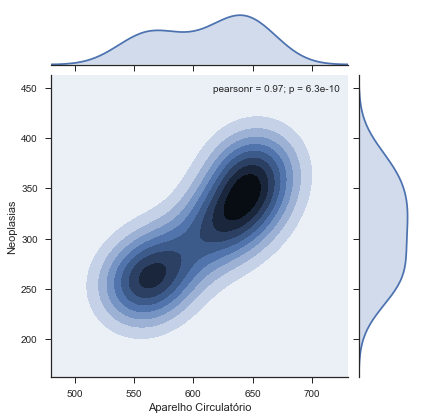

In [76]:
sns.jointplot(x="Aparelho Circulatório", y="Neoplasias", data=taxamortH60, kind="kde");


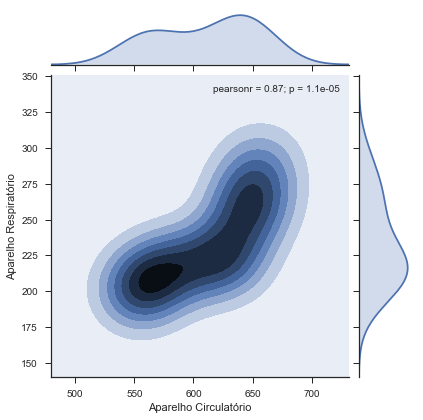

In [81]:
sns.jointplot(x="Aparelho Circulatório", y="Aparelho Respiratório", data=taxamortH60, kind="kde");

In [89]:
taxamortM60['Aparelho Circulatório'].pct_change()

0          NaN
1    -0.003438
2     0.021221
3     0.001490
4     0.035550
5    -0.007598
6     0.064648
7     0.005526
8     0.018789
9     0.007175
10    0.012404
11    0.023404
12   -0.010723
13    0.009984
14    0.000119
15    0.018003
Name: Aparelho Circulatório, dtype: float64

0          NaN
1     0.011603
2     0.036384
3     0.016000
4     0.049950
5     0.005424
6     0.077671
7     0.016943
8     0.029605
9     0.017354
10    0.022346
11    0.033284
12   -0.001335
13    0.019363
14    0.009160
15    0.026905
Name: Aparelho Circulatório, dtype: float64

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [92]:
arvoredecide=DecisionTreeRegressor()

In [93]:
for a in taxa:
    a['idade']= a.name
    a['genero']=

NameError: name 'X' is not defined

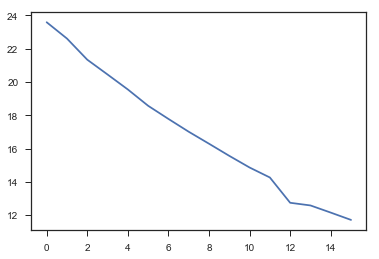

In [99]:
plt.plot(mortalidadeinfantil['Mortalidade Infantil '])

In [97]:
mortalidadeinfantil

,Ano,Mortalidade Infantil
0,2000,23.59
1,2001,22.61
2,2002,21.34
3,2003,20.45
4,2004,19.55
5,2005,18.57
6,2006,17.78
7,2007,17.01
8,2008,16.29
9,2009,15.56


In [104]:
taxamortH60['genero'] = ['Homens'] * 16
taxamortH60['idade'] = ['Acima de 60'] * 16
taxamortH2059['genero'] = ['Homens'] * 16
taxamortH2059['idade'] = ['Entre 20 e 59'] * 16 
taxamortH1019['genero'] = ['Homens'] * 16
taxamortH1019['idade'] = ['Entre 10 e 19'] * 16 
taxamortM60['genero'] = ['Mulheres'] * 16
taxamortM60['idade'] = ['Acima de 60'] * 16
taxamortM2059['genero'] = ['Mulheres'] * 16
taxamortM2059['idade'] = ['Entre 20 e 59'] * 16 
taxamortM1019['genero'] = ['Mulheres'] * 16
taxamortM1019['idade'] = ['Entre 10 e 19'] * 16 
#taxamortM2059
#taxamortM1019 

In [106]:
taxamortH60.index

RangeIndex(start=0, stop=16, step=1)

In [115]:
taxamortH60

taxamortH2059.index=range(17,33)
 
taxamortH1019.index=range(34,50)

taxamortM60.index=range(51,67)

taxamortM2059.index=range(68,84)

taxamortM1019.index=range(85,101)


In [117]:
#frames = [df1, df2, df3]

todastaxas = pd.concat(taxas)

In [118]:
todastaxas

,Ano,Aparelho Circulatorio,Aparelho Circulatório,Aparelho Digestivo,Aparelho Respiratório,Causas Externas,Endocrinas,Infecciosas Parasitárias,Neoplasias,Sintomas e Sinais,Sintomas e sinais,Sistema Nervoso,genero,idade
0,2000,NaN,552.451057,NaN,195.649958,NaN,77.864499,NaN,244.363272,257.930094,NaN,NaN,Homens,Acima de 60
1,2001,NaN,553.779692,NaN,198.675438,NaN,78.620951,NaN,250.430655,262.389803,NaN,NaN,Homens,Acima de 60
2,2002,NaN,555.152815,NaN,206.045102,NaN,80.992589,NaN,257.493784,258.461889,NaN,NaN,Homens,Acima de 60
3,2003,NaN,567.401586,NaN,213.544777,NaN,85.150274,NaN,263.331856,254.644619,NaN,NaN,Homens,Acima de 60
4,2004,NaN,583.241848,NaN,222.970667,NaN,87.979862,NaN,273.086464,238.457070,NaN,NaN,Homens,Acima de 60
5,2005,NaN,572.756321,NaN,209.361774,NaN,90.278689,NaN,283.185384,190.621564,NaN,NaN,Homens,Acima de 60
6,2006,NaN,606.955874,NaN,217.977079,NaN,97.911932,NaN,297.058779,152.050168,NaN,NaN,Homens,Acima de 60
7,2007,NaN,616.903870,NaN,219.879505,NaN,100.687707,NaN,306.683929,139.573418,NaN,NaN,Homens,Acima de 60
8,2008,NaN,630.962040,NaN,218.452015,NaN,106.859887,NaN,317.658780,136.842789,NaN,NaN,Homens,Acima de 60
9,2009,NaN,631.352013,NaN,228.987591,NaN,111.180651,NaN,321.566609,134.165751,NaN,NaN,Homens,Acima de 60
